## Proyecto \#1

### Statistical Learning  (2022)

Integrantes:
* Belter Molina Guevara
* Esvin Molina Guevara

---

Importamos las librearías a utilizar:

In [1]:
# Importamos las librearías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Cargamos los datos y los convertimos a DataFrame:

In [3]:
# Cargamos los datos
data = np.load('data/proyecto_training_data.npy')

# Convertimos a DataFrame los datos para trabajar de una manera mas cómoda
dataset = pd.DataFrame(
                data,
                columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
             )

# Mostramos las primeras cinco lineas del dataset
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


---
2. Hacemos el slicing de los datos para entrenamiento y pruebas:

In [4]:
# Hacemos el slicing de los datos
# training_data = 80%
# testing_data = 20%

training_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=2022)


---
3. Análisis exploratorio de datos: Para cada variable en el data set calcular:
* media
* valor máximo
* valor mínimo
* rango (peak to peak, no el rango del tensor que por ser vector se sabe que es 1)
* desviación estándar

In [5]:
# Análisis exploratorio de los datos
df = training_data.copy()

for col in df.columns:
    media = np.mean(df[col])
    maximo = np.max(df[col])
    minimo = np.min(df[col])
    desviacion_est = np.std(df[col])
    rango = np.ptp(df[col])

    print(f'Variable {col}:')
    print(f'   media: {media}')
    print(f'   valor máximo: {maximo}')
    print(f'   valor mínimo:{minimo}')
    print(f'   rango: {rango}')
    print(f'   desviación estándar: {desviacion_est}')

Variable SalePrice:
   media: 179797.8385518591
   valor máximo: 755000.0
   valor mínimo:34900.0
   rango: 720100.0
   desviación estándar: 79557.5089076042
Variable OverallQual:
   media: 6.075342465753424
   valor máximo: 10.0
   valor mínimo:1.0
   rango: 9.0
   desviación estándar: 1.3838595133812954
Variable 1stFlrSF:
   media: 1155.4471624266146
   valor máximo: 4692.0
   valor mínimo:334.0
   rango: 4358.0
   desviación estándar: 392.29159230366366
Variable TotRmsAbvGrd:
   media: 6.529354207436399
   valor máximo: 12.0
   valor mínimo:2.0
   rango: 10.0
   desviación estándar: 1.6559858137789973
Variable YearBuilt:
   media: 1970.7348336594912
   valor máximo: 2010.0
   valor mínimo:1872.0
   rango: 138.0
   desviación estándar: 30.46802468653229
Variable LotFrontage:
   media: 70.08274231678487
   valor máximo: 313.0
   valor mínimo:21.0
   rango: nan
   desviación estándar: 23.89872762466252


---
4. Para cada variable en el dataset, crear un histograma

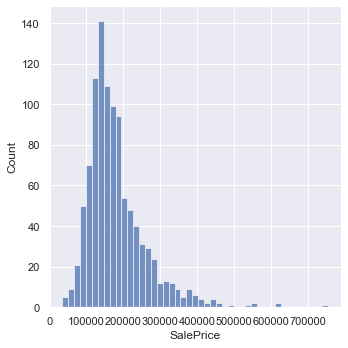

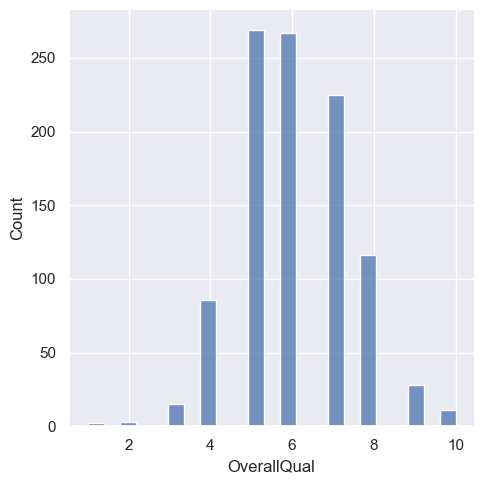

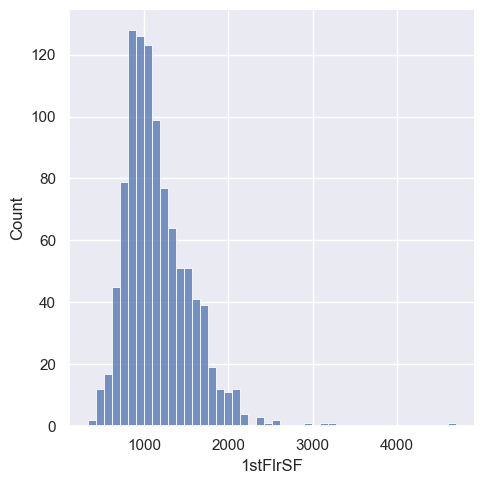

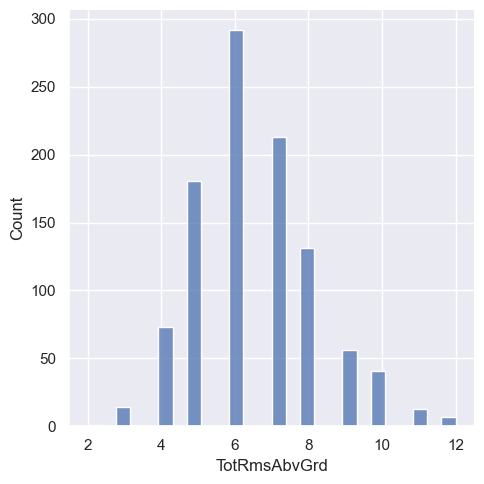

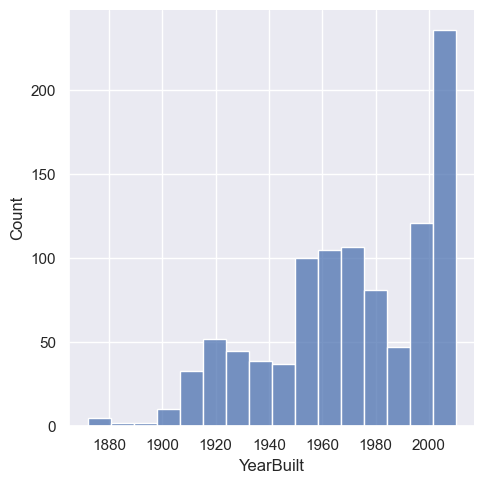

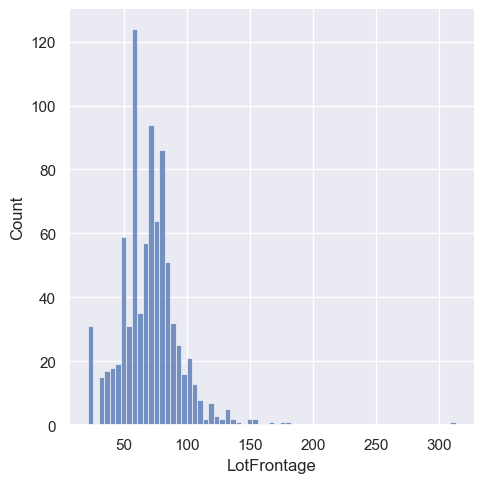

In [6]:
# Gráficos - Histograma para cada variable 
df = training_data.copy()

sns.set_theme()
for col in df.columns:
    sns.displot(df[col])  

---
5. Elegimos las dos variables con mayor potencial predictivo para la variable dependiente:

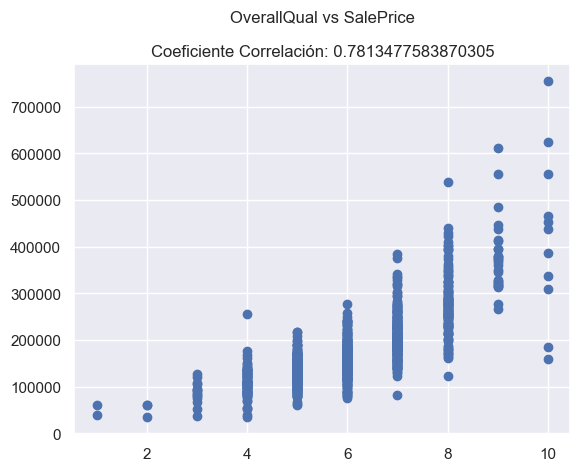

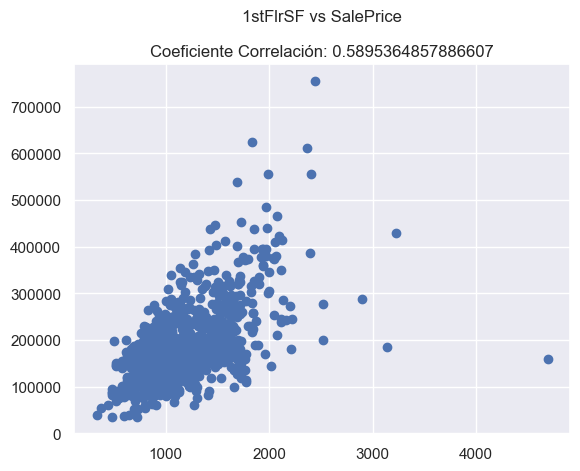

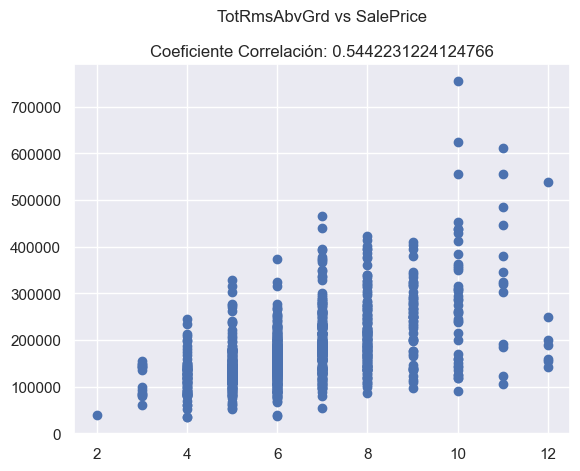

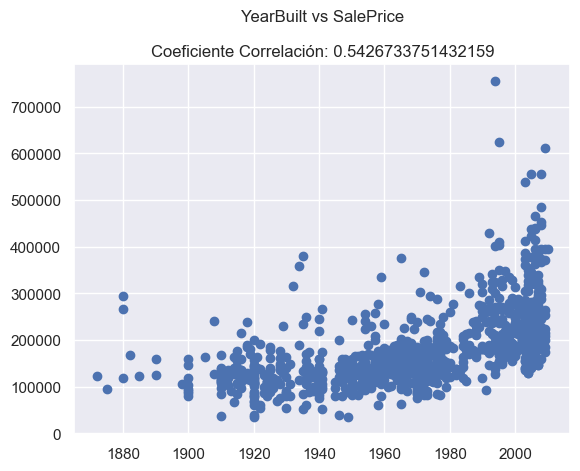

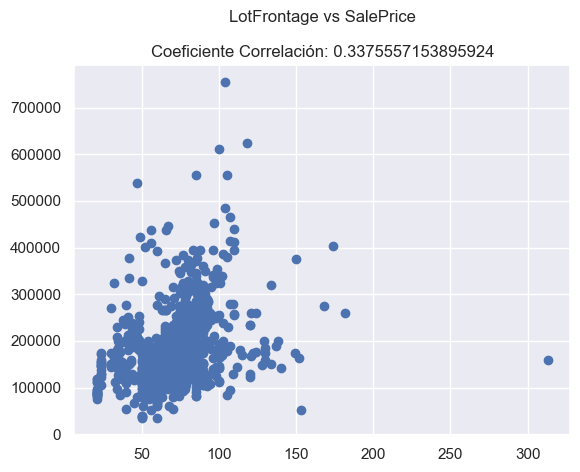

{'OverallQual': 0.7813477583870305, '1stFlrSF': 0.5895364857886607, 'TotRmsAbvGrd': 0.5442231224124766, 'YearBuilt': 0.5426733751432159, 'LotFrontage': 0.3375557153895924}


In [7]:
# Elegir las dos variables con mayor potencial predictivo para la variable dependiente

df = training_data.copy()
target = 'SalePrice'

# Para cada variable calculamos el coeficiente de correlación
# y realizamos un gráfico (scatterplot) de cada variable vs el target (SalePrice)
dict_correlacion = {}
X = df.copy()
X.drop(target,axis=1,inplace=True)
for col in X.columns:
    dict_correlacion[col] = df[target].corr(X[col], method='pearson')
    plt.scatter(df[col], df[target])
    plt.title( col + ' vs ' + target + '\n\nCoeficiente Correlación: ' + str(dict_correlacion[col]))
    plt.show()
    
print(dict_correlacion)


Podemos observar que las dos variables con mayor potencial predictivo para la columna target son:
1. OverallQual, con una correlación 0.7813477583870305
2. 1stFlrSF, con una correlación 0.5895364857886607

---
6 y 7. Crear función para entrenar un modelo de regresión lineal de una variable:

In [8]:
def entrenar(x, y, epochs, imprimir_error_cada, learning_rate, betas = []):
    np.random.seed(123) # inicializamos el seed para números aleatorios
    
    # si no hay betas iniciales, entonces creamos unos al azar
    if not betas: 
        betas = np.random.rand(2)  # comenzamos con unos betas al azar

    n = y.size  

    costos = []
    listado_betas = [betas]  # listado de los betas de cada modelo

    for epoch in range(epochs):  
        # calculamos los valores estimados
        yestimado = np.dot(x, betas)

        # calculamos el error
        error = yestimado - y         

        # el costo asociado al modelo 
        costo = 1/(2*n) * np.dot(error.T, error)

        # almacenos el costo en una lista
        costos.append(costo)

        # calculamos los nuevos gradientes
        betas = betas - (learning_rate * (1/n) * np.dot(x.T, error))

        # almacenos los gradientes (betas) en una lista
        listado_betas.append(betas)
        
    # la función retorna el listado de betas calculados y los costos
    return listado_betas, costos

Función para visualizar como cambia el error en el tiempo.

In [9]:
def visualizar_error(errores, variable, target):
    # calculamos el numero de elementos en el eje X (la cantidad de iteraciones)
    epocs = list(range(0,len(errores)))
    
    # graficamos
    plt.plot(epocs, errores)
    plt.xlabel('No. Época')
    plt.ylabel('Error/Costo')
    plt.title('Costo del Modelo:\n' + target+ ' vs ' + variable )
    plt.show()

Función para visualizar como evoluciona el modelo.

In [12]:
# Función que despliega una linea dado su intercepto y pendiente
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Función que muestra las lineas que forman cada modelo
# y que muestra según el numero de iteraciones n
def visualizar_modelos(modelos, n):
    i = 0
    for modelo in modelos:
        if ((i%n==0) & (i!=0)):
            intercepto = modelo[0]
            pendiente = modelo[1]
            abline(pendiente, intercepto)            
        i = i + 1    

#visualizar_modelos(listado_betas,100)

In [17]:
import matplotlib.animation as animation
import io
import base64
from IPython.display import HTML

# Esta función genera un archivo gif de los modelos según
# los modelos y costos que se reciben como parámetros.
def generar_gif(variable,target,modelos,costos,nombre_archivo):
    fig = plt.figure()
    ax = plt.axes()
    nombre_variable = variable
    plt.title(target + ' vs ' + nombre_variable)
    plt.xlabel(nombre_variable)
    plt.ylabel(target)
    plt.scatter(x[:,1], y, color='red')
    line, = ax.plot([], [], lw=2)
    annotation = ax.text(-1, 800000, '')
    annotation.set_animated(True)
    plt.close()

    # generamos los datos del gif
    def init():
        line.set_data([], [])
        annotation.set_text('')
        return line, annotation

    # esta función que genera cada linea
    def animate(i):
        x = np.linspace(-5, 20, 1000)
        y = modelos[i][1]*x + modelos[i][0]
        line.set_data(x, y)
        annotation.set_text('Costo = %.2f e10' % (costos[i]/10000000000))
        return line, annotation

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=300, interval=0, blit=True)

    # guardamos la animación como archivo gif
    anim.save(nombre_archivo, writer='imagemagick', fps = 30)

# Esta función carga un archivo gif y devuelve los bytes codificados en Base64
# que luego puede utilizarse para mostrarse en elementos HTML
def cargar_gif(nombre_archivo):
    archivo = io.open(nombre_archivo, 'r+b').read()
    video_codificado = base64.b64encode(archivo)
    return video_codificado


Entrenando el Modelo de Regresión Lineal: OverallQual vs SalePrice

In [14]:
# Para la variable OverallQual 

x = training_data['OverallQual']
y = training_data['SalePrice']
x = np.c_[np.ones(x.shape[0]), x] 

lr = 0.01 # el learning rate
n_epochs = 30000 # cantidad de épocas
imprimir_error_cada = 10  

# Ejecutamos el algoritmo de gradient descent
listado_betas, costos = entrenar(x, y, n_epochs, imprimir_error_cada, lr)
betas = listado_betas[-1]

print("Resultados del entrenamiento B0 y B1: {:.2f}, {:.2f}".format(betas[0], betas[1]))

# Para OverallQual
# Con alpha: 0.01,  Epochs: 30000, Tenemos gradientes B0 y B1: -93102.59, 44919.35

Resultados del entrenamiento B0 y B1: -93102.59, 44919.35


Visualizamos como cambia el error en el tiempo para el modelo: OverallQual vs SalePrice

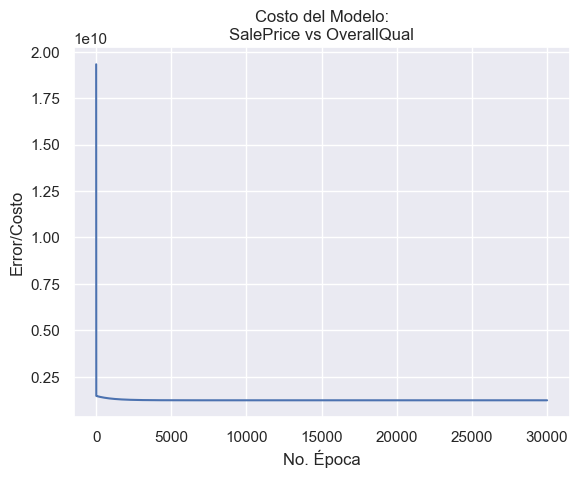

In [15]:
visualizar_error(costos,'OverallQual', 'SalePrice')

Visualizamos como evoluciona modelo: OverallQual vs SalePrice

MovieWriter imagemagick unavailable; using Pillow instead.



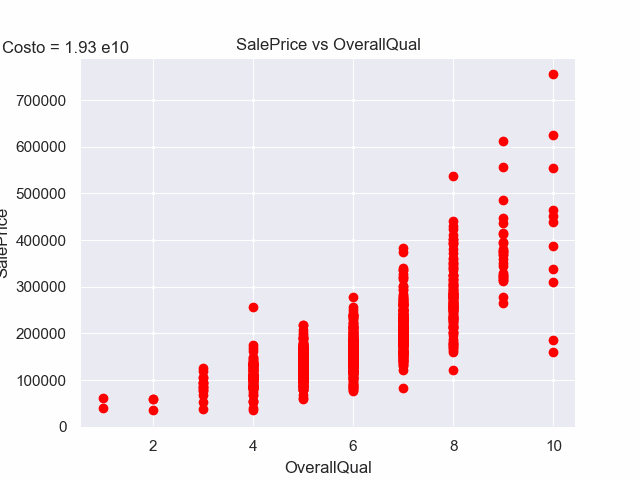

In [18]:
# generamos el gif
variable = 'OverallQual'
target = 'SalePrice'
generar_gif(variable, target, listado_betas, costos, variable + '.gif' )

# cargamos el gif y lo mostramos como etiqueta img de HTML
gif_html=cargar_gif(variable + '.gif')
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(gif_html.decode('ascii')))

Entrenando el Modelo de Regresión Lineal: 1stFlrSF vs SalePrice

In [19]:
# Para la variable 1stFlrSF 

x = training_data['1stFlrSF']
y = training_data['SalePrice']
x = np.c_[np.ones(x.shape[0]), x] 

lr = 0.0000001 # el learning rate
n_epochs = 20000 # cantidad de épocas
imprimir_error_cada = 10  

# Ejecutamos el algoritmo de gradient descent
listado_betas, costos = entrenar(x, y, n_epochs, imprimir_error_cada, lr, betas=[41500,10])
betas = listado_betas[-1]

print("Resultados del entrenamiento B0 y B1: {:.2f}, {:.2f}".format(betas[0], betas[1]))

# Para 1stFlrSF
# Con alpha: 0.0000001,  Epochs: 20000, Tenemos gradientes B0 y B1: 41500.12, 119.68

Resultados del entrenamiento B0 y B1: 41500.12, 119.68


Visualizamos como cambia el error en el tiempo para el modelo: 1stFlrSF vs SalePrice

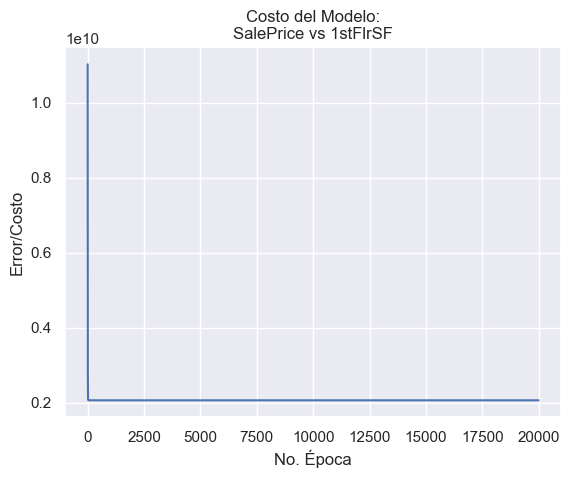

In [20]:
visualizar_error(costos,'1stFlrSF', 'SalePrice')

Visualizamos como evoluciona modelo: 1stFlrSF vs SalePrice

MovieWriter imagemagick unavailable; using Pillow instead.



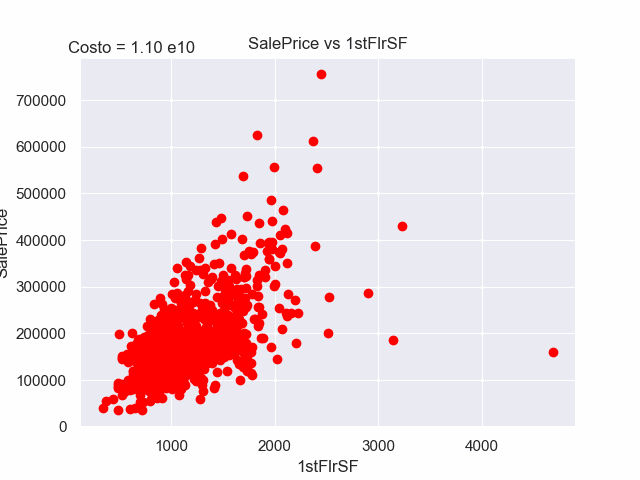

In [21]:
# generamos el gif
variable = '1stFlrSF'
target = 'SalePrice'
generar_gif(variable, target, listado_betas, costos, variable + '.gif' )

# cargamos el gif y lo mostramos como etiqueta img de HTML
gif_html=cargar_gif(variable + '.gif')
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(gif_html.decode('ascii')))

Crear modelo de regresión lineal usando scikit-learn: OverallQual vs SalePrice

In [22]:
variable = 'OverallQual'
target = 'SalePrice'

regressor = LinearRegression()
regressor.fit(training_data[variable].values.reshape(-1, 1), training_data[target].values)

print("Resultados del entrenamiento con scikit-learn, B0 y B1: {:.2f}, {:.2f}".format(regressor.intercept_, regressor.coef_[0]))

Resultados del entrenamiento con scikit-learn, B0 y B1: -93102.65, 44919.36


Crear modelo de regresión lineal usando scikit-learn: 1stFlrSF vs SalePrice

In [23]:
variable = '1stFlrSF'
target = 'SalePrice'

regressor = LinearRegression()
regressor.fit(training_data[variable].values.reshape(-1, 1), training_data[target].values)

print("Resultados del entrenamiento con scikit-learn, B0 y B1: {:.2f}, {:.2f}".format(regressor.intercept_, regressor.coef_[0]))


Resultados del entrenamiento con scikit-learn, B0 y B1: 41653.54, 119.56
